In [1]:
'''Schritt 2
Die Daten von den bekannten OBS-Portalen werden heruntergeladen.

Das ist alles nur geklaut, heyoheyo..
von hier: 
https://nbviewer.org/github/radverkehr/OpenBikeSensor_Analysis/blob/main/code/getPublicData_portale.ipynb
"""

'Das ist alles nur geklaut, heyoheyo..\nvon hier: \nhttps://nbviewer.org/github/radverkehr/OpenBikeSensor_Analysis/blob/main/code/getPublicData_portale.ipynb\n'

In [1]:
import requests
import json
import glob

import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
from matplotlib_scalebar.scalebar import ScaleBar
from shapely.geometry.point import Point as PointSly
import contextily as ctx

from datetime import date
from tqdm import tqdm
from geojson import Point, Feature, FeatureCollection, dump

print('import successful')

import successful


In [2]:
#es werden alle portale genutzt, da teilweise auch Fahrten in BBB in anderen Portalen abgelegt sind
portale_list= \
['https://obs.adfc-brandenburg.de/',
 'https://obs.adfc-bw.de/',
 'https://obs.radentscheid-essen.de/',
 'https://portal.openbikesensor.org/',
 'https://obs.adfc-darmstadt.de/',
 'https://obs.adfc-osnabrueck.de/',
 'https://obs.adfc-ac.de/',
 'https://obs-portal.pub.solar/',
'https://obs.adfc-luebeck.de/',
'https://portal.1meter50.at/',
'https://portal.openbikesensor.hamburg/',
'https://obs.adfc-hessen.de/']

In [3]:
#portale_list_str=[]
for p in portale_list:
    p_str=p.replace('https://','').replace('.de/','').replace('.org/','').replace('obs.','').replace('.pub.solar/','-koeln').replace('.','-').replace('/','')#.replace('-','_')
    print(p_str)
    #portale_list_str.append(p_str)

adfc-brandenburg
adfc-bw
radentscheid-essen
portal-openbikesensor
adfc-darmstadt
adfc-osnabrueck
adfc-ac
obs-portal-koeln
adfc-luebeck
portal-1meter50-at
portal-openbikesensor-hamburg
adfc-hessen


In [2]:
datum=date.today().strftime("%y%m%d")  #Das aktuelle Datum im Format YYMMDD für Verwendung in Dateinamen

In [4]:
for p in portale_list[:]:
    url = p + "api/export/events?bbox=-0.19922377649033446,58.13748613913617,20.921758549385075,43.25705589043925&fmt=geojson"  #einfach riesiege bbbox

    response = requests.request("GET", url)
    response_dict = json.loads(response.text)
    
    #p_str=p.replace('https://','').replace('.de/','').replace('.org/','').replace('obs.','').replace('.pub.solar/','-koeln')
    p_str=p.replace('https://','').replace('.de/','').replace('.org/','').replace('obs.','').replace('.pub.solar/','-koeln').replace('.','-').replace('/','')#.replace('-','_')

    with open('../OBS-roh/Einzeldateien/'+datum+'_portalSnap_'+p_str+'.geojson', 'w') as f:
        dump(response_dict, f)

In [3]:
files = glob.glob(r'../OBS-roh/Einzeldateien/*.geojson')
len(files)

12

In [4]:
gdf =gpd.GeoDataFrame()

for f in tqdm(files):
    gdf_this = gpd.read_file(f, crs='EPSG:4326')
    portal_name=f.split('_')[-1].replace('.geojson','')
    datum_stand=f.split('_')[0].replace('portale\\','')
    
    gdf_this['portal']= portal_name
    gdf = gpd.GeoDataFrame(pd.concat([gdf, gdf_this], ignore_index=True), crs=gdf_this.crs)  # ersetzt: gdf=gdf.append(gdf_this), da append veraltet ist.
    #gdf=gdf.append(gdf_this)
    
    print ("portal_name: " + portal_name)
    print ("Anzahl Datenpunkte: " + str(len(gdf_this)))
    print ("Stand vom: " + datum_stand)
    
                                        
print ("\nAnzahl Datenpunkte gesamt: "+ str(len(gdf)))

  8%|▊         | 1/12 [00:00<00:04,  2.46it/s]

portal_name: adfc-ac
Anzahl Datenpunkte: 4007
Stand vom: ../OBS-roh/Einzeldateien/231122


 17%|█▋        | 2/12 [00:01<00:08,  1.12it/s]

portal_name: adfc-brandenburg
Anzahl Datenpunkte: 19897
Stand vom: ../OBS-roh/Einzeldateien/231122


 25%|██▌       | 3/12 [00:05<00:21,  2.41s/it]

portal_name: adfc-bw
Anzahl Datenpunkte: 70130
Stand vom: ../OBS-roh/Einzeldateien/231122


 33%|███▎      | 4/12 [00:07<00:16,  2.10s/it]

portal_name: adfc-darmstadt
Anzahl Datenpunkte: 26500
Stand vom: ../OBS-roh/Einzeldateien/231122


 42%|████▏     | 5/12 [00:09<00:13,  1.91s/it]

portal_name: adfc-hessen
Anzahl Datenpunkte: 24532
Stand vom: ../OBS-roh/Einzeldateien/231122


 50%|█████     | 6/12 [00:09<00:08,  1.43s/it]

portal_name: adfc-luebeck
Anzahl Datenpunkte: 8499
Stand vom: ../OBS-roh/Einzeldateien/231122


 58%|█████▊    | 7/12 [00:11<00:07,  1.56s/it]

portal_name: adfc-osnabrueck
Anzahl Datenpunkte: 25606
Stand vom: ../OBS-roh/Einzeldateien/231122


 67%|██████▋   | 8/12 [00:12<00:05,  1.31s/it]

portal_name: obs-portal-koeln
Anzahl Datenpunkte: 12756
Stand vom: ../OBS-roh/Einzeldateien/231122


 75%|███████▌  | 9/12 [00:12<00:03,  1.10s/it]

portal_name: portal-1meter50-at
Anzahl Datenpunkte: 10367
Stand vom: ../OBS-roh/Einzeldateien/231122


 83%|████████▎ | 10/12 [00:15<00:02,  1.44s/it]

portal_name: portal-openbikesensor-hamburg
Anzahl Datenpunkte: 35444
Stand vom: ../OBS-roh/Einzeldateien/231122


 92%|█████████▏| 11/12 [00:19<00:02,  2.41s/it]

portal_name: portal-openbikesensor
Anzahl Datenpunkte: 69651
Stand vom: ../OBS-roh/Einzeldateien/231122


100%|██████████| 12/12 [00:20<00:00,  1.73s/it]

portal_name: radentscheid-essen
Anzahl Datenpunkte: 18054
Stand vom: ../OBS-roh/Einzeldateien/231122

Anzahl Datenpunkte gesamt: 325443


In [6]:
gdf

,distance_overtaker,distance_stationary,direction,way_id,course,speed,time,geometry,portal
0,1.55,NaN,1,258080570.0,5.811518,5.305556,2023-05-10 05:03:01+00:00,POINT (6.18443 50.77673),adfc-ac
1,1.45,NaN,1,258080570.0,5.743257,5.722222,2023-05-10 05:03:04+00:00,POINT (6.18466 50.77664),adfc-ac
2,1.72,NaN,1,355472515.0,5.068541,6.194444,2023-05-10 05:10:59+00:00,POINT (6.21896 50.78473),adfc-ac
3,1.41,NaN,1,355472515.0,5.065178,6.027778,2023-05-10 05:11:05+00:00,POINT (6.21912 50.78442),adfc-ac
4,1.18,1.79,-1,355472513.0,0.422521,5.333333,2023-05-10 05:13:33+00:00,POINT (6.22224 50.77968),adfc-ac
...,...,...,...,...,...,...,...,...,...
325438,1.18,NaN,1,32572953.0,0.439461,5.333333,2023-11-13 17:10:25+00:00,POINT (6.92042 51.52107),radentscheid-essen
325439,1.00,NaN,1,463332196.0,0.555712,8.666667,2023-11-13 17:10:32+00:00,POINT (6.92132 51.52135),radentscheid-essen
325440,0.87,NaN,-1,22635047.0,4.605602,4.888889,2023-11-13 17:10:52+00:00,POINT (6.92228 51.52112),radentscheid-essen
325441,1.36,NaN,-1,79607981.0,5.310893,5.416667,2023-11-13 17:10:59+00:00,POINT (6.92245 51.52069),radentscheid-essen


In [5]:
#Für Auswertung in BBB: nur Daten innerhalb BBox für Brandenburg relevant, Datenmenge dann kleiner.
ymin = 51.3592
xmin = 11.2657
ymax = 53.5587
xmax = 14.7657
gdf_BBB = gdf.cx[xmin:xmax, ymin:ymax]
gdf_BBB

,distance_overtaker,distance_stationary,direction,way_id,course,speed,time,geometry,portal
0,1.55,NaN,1,258080570.0,5.811518,5.305556,2023-05-10 05:03:01+00:00,POINT (6.18443 50.77673),adfc-ac
1,1.45,NaN,1,258080570.0,5.743257,5.722222,2023-05-10 05:03:04+00:00,POINT (6.18466 50.77664),adfc-ac
2,1.72,NaN,1,355472515.0,5.068541,6.194444,2023-05-10 05:10:59+00:00,POINT (6.21896 50.78473),adfc-ac
3,1.41,NaN,1,355472515.0,5.065178,6.027778,2023-05-10 05:11:05+00:00,POINT (6.21912 50.78442),adfc-ac
4,1.18,1.79,-1,355472513.0,0.422521,5.333333,2023-05-10 05:13:33+00:00,POINT (6.22224 50.77968),adfc-ac
...,...,...,...,...,...,...,...,...,...
325438,1.18,NaN,1,32572953.0,0.439461,5.333333,2023-11-13 17:10:25+00:00,POINT (6.92042 51.52107),radentscheid-essen
325439,1.00,NaN,1,463332196.0,0.555712,8.666667,2023-11-13 17:10:32+00:00,POINT (6.92132 51.52135),radentscheid-essen
325440,0.87,NaN,-1,22635047.0,4.605602,4.888889,2023-11-13 17:10:52+00:00,POINT (6.92228 51.52112),radentscheid-essen
325441,1.36,NaN,-1,79607981.0,5.310893,5.416667,2023-11-13 17:10:59+00:00,POINT (6.92245 51.52069),radentscheid-essen


In [6]:
# Duplikate löschen, falls User Daten auf mehrere Portale geladen haben
gdf_BBB=gdf_BBB.drop_duplicates(subset=['distance_overtaker','time','geometry']).copy()
gdf_BBB

,distance_overtaker,distance_stationary,direction,way_id,course,speed,time,geometry,portal
0,1.55,NaN,1,258080570.0,5.811518,5.305556,2023-05-10 05:03:01+00:00,POINT (6.18443 50.77673),adfc-ac
1,1.45,NaN,1,258080570.0,5.743257,5.722222,2023-05-10 05:03:04+00:00,POINT (6.18466 50.77664),adfc-ac
2,1.72,NaN,1,355472515.0,5.068541,6.194444,2023-05-10 05:10:59+00:00,POINT (6.21896 50.78473),adfc-ac
3,1.41,NaN,1,355472515.0,5.065178,6.027778,2023-05-10 05:11:05+00:00,POINT (6.21912 50.78442),adfc-ac
4,1.18,1.79,-1,355472513.0,0.422521,5.333333,2023-05-10 05:13:33+00:00,POINT (6.22224 50.77968),adfc-ac
...,...,...,...,...,...,...,...,...,...
325438,1.18,NaN,1,32572953.0,0.439461,5.333333,2023-11-13 17:10:25+00:00,POINT (6.92042 51.52107),radentscheid-essen
325439,1.00,NaN,1,463332196.0,0.555712,8.666667,2023-11-13 17:10:32+00:00,POINT (6.92132 51.52135),radentscheid-essen
325440,0.87,NaN,-1,22635047.0,4.605602,4.888889,2023-11-13 17:10:52+00:00,POINT (6.92228 51.52112),radentscheid-essen
325441,1.36,NaN,-1,79607981.0,5.310893,5.416667,2023-11-13 17:10:59+00:00,POINT (6.92245 51.52069),radentscheid-essen


Text(0.05, 0.01999999999999999, 'N')

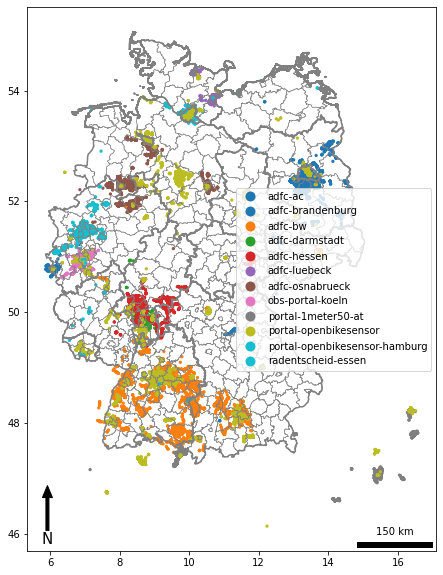

In [6]:
fig, ax = plt.subplots(figsize=(10, 10))
#gdf_BBB25833 = gdf_BBB.to_crs(25833) # Daten in kartesisches Koordinatensystem transformieren, für einfaches Erstellen der Maßstabsleiste
gdf_BBB[::].plot(ax=ax, column='portal', s=5, legend=True)

#Überbldung (Hinterlegen) von den Grenzen der Bundesländer in blau und den Kreisen in grau
bland = gpd.read_file('https://raw.githubusercontent.com/isellsoap/deutschlandGeoJSON/main/4_kreise/1_sehr_hoch.geo.json')
bland.boundary.plot(ax=ax, color='gray', linewidth=0.5) 
bland = gpd.read_file('https://raw.githubusercontent.com/isellsoap/deutschlandGeoJSON/main/2_bundeslaender/1_sehr_hoch.geo.json')
bland.boundary.plot(ax=ax, color='gray')  

#----Massstabsleiste----
points = gpd.GeoSeries([PointSly(12.5, 52.5), PointSly(13.5,52.5)], crs=4326) #Koordinaten in BB, mit einem Längengrad abstand
points = points.to_crs(25833)  # Projected WGS 84 zu CS in meters
distance_meters = points[0].distance(points[1]) #Berechnung des Abstands in Metern zwischen den Punkten als Referenzwert
ax.add_artist(ScaleBar(distance_meters,location="lower right", scale_loc="top", box_alpha=0.2))
#----Nordpfeil----
x, y, arrow_length = 0.05, 0.12, 0.1
ax.annotate('N', xy=(x, y), xytext=(x, y-arrow_length),
            arrowprops=dict(facecolor='black', width=3, headwidth=10),
            ha='center', va='center', fontsize=15,
            xycoords=ax.transAxes)

#Begrenzt den Plotbereich auf BBox von Brandenburg
xlim = ([xmin*0.998, xmax*1.002])
ylim = ([ymin*0.998, ymax*1.002])
ax.set_xlim(xlim)
ax.set_ylim(ylim)

/tmp/ipykernel_15181/231195046.py:22: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap2 = plt.cm.get_cmap(name='tab10')


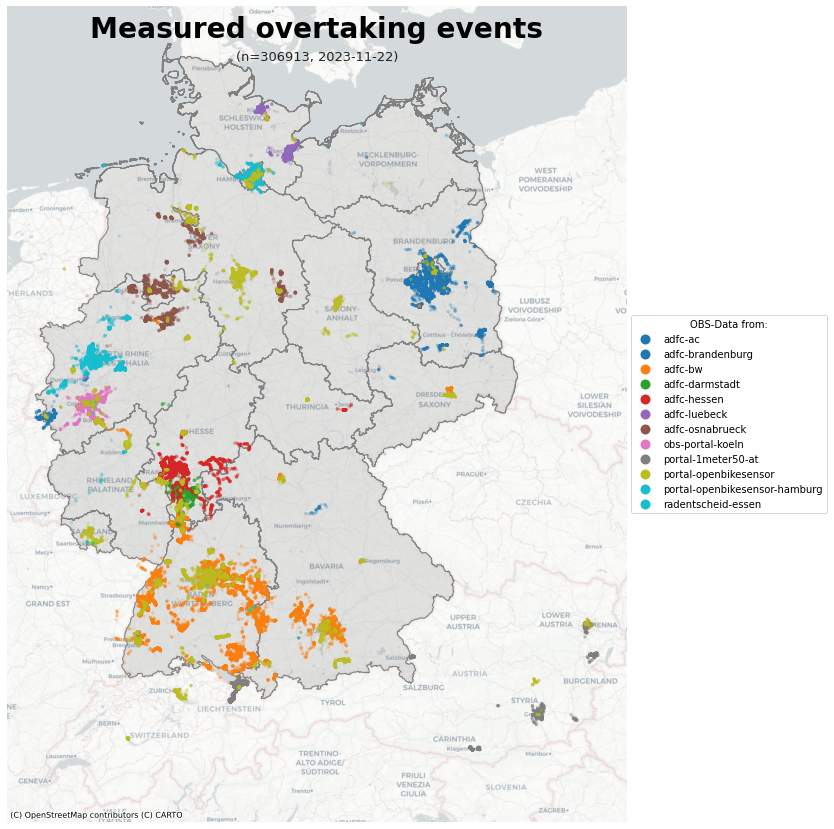

In [9]:
# Function
def makeLayeredMap(*args):
    """This function accepts an arbitrary number of geodataframes, plots them on top of a Contextily basemap. 
    NOTE: Please edit the Plotting-section to specify parameters for the number of layers and the formatting of each layer.
    Output: Saved file and layered map for display."""
    
    # Convert the CRS for all layers to EPSG3857 to match Contextily
    args = list(map(lambda x: x.to_crs(epsg=3857), args))
    # Create figure
    fig, ax = plt.subplots(1, figsize=(15, 15))
    #Set aspect to equal
    ax.set_aspect('equal')
    
   
    # PLOTTING: Specify layers to plot how to format each layer (colours, transparency, etc.):
    # Layer 1:
    args[0].plot(ax=ax,facecolor="grey", alpha=0.2, figsize=(15,15))
    args[0].plot(ax=ax,facecolor="none", alpha=1, edgecolor='grey', linewidths=1, figsize=(15,15))
    # Layer 2:
    args[1].plot(ax=ax, alpha=0.2, zorder=2, markersize=6, column='portal', cmap='tab10', legend=True, legend_kwds={"loc": "center left", "bbox_to_anchor": (1, 0.5),"title":"OBS-Data from:"}) #color='#0069B4',   # , "opacity":1
     
    cmap2 = plt.cm.get_cmap(name='tab10')
    for count, legend_handle in enumerate(ax.get_legend().legend_handles):     
        legend_handle.set(alpha = 1.0, color = cmap2(count))
    
 
    # Contextily basemap:
    ctx.add_basemap(ax, source=ctx.providers.CartoDB.Positron) 
    #ctx.add_basemap(ax, source=ctx.providers.CartoDB.Positron, reset_extent=False, zoom = 10) 
   
    # Turn off axis
    ax.set_axis_off()
    
    ax.text(x=0.5, y=0.955, s='Measured overtaking events', fontsize=28, weight='bold', ha='center', va='bottom', transform=ax.transAxes)
    #ax.text(x=0.5, y=0.92, s="OBS-Data: "+portale_list_str_+"ADFC Brandenburg, Radentscheid Essen, ADFC BW, OBS-Portal, \n  ADFC Darmstadt, ADFC Osnabrück: (n=" + str(len(args[1])) + ", 2022-11-07)", fontsize=13, alpha=0.85, ha='center', va='bottom', transform=ax.transAxes)
    ax.text(x=0.5, y=0.93, s="(n=" + str(len(args[1])) + ", 2023-11-22)", fontsize=13, alpha=0.85, ha='center', va='bottom', transform=ax.transAxes)
    
    layered_map = plt.show()
    
    #fig.savefig("plots\OBS_analysis_map_Deutschland_80dpi.png", dpi=80)
    #fig.savefig("plots\OBS_analysis_map_Deutschland_colored_80dpi.png", dpi=80, bbox_inches="tight") 
    
    return(layered_map)

makeLayeredMap(bland,gdf_BBB)


In [10]:
gdf_BBB.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
Index: 306913 entries, 0 to 325442
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype              
---  ------               --------------   -----              
 0   distance_overtaker   300588 non-null  float64            
 1   distance_stationary  124040 non-null  float64            
 2   direction            306913 non-null  int64              
 3   way_id               303515 non-null  float64            
 4   course               306703 non-null  float64            
 5   speed                306407 non-null  float64            
 6   time                 306913 non-null  datetime64[ns, UTC]
 7   geometry             306913 non-null  geometry           
 8   portal               306913 non-null  object             
dtypes: datetime64[ns, UTC](1), float64(5), geometry(1), int64(1), object(1)
memory usage: 23.4+ MB


In [7]:
#Ausgabe der Daten als GeoJSON

gdf_BBB = gpd.GeoDataFrame(gdf_BBB, geometry='geometry', crs='EPSG:4326')
gdf_BBB = gdf_BBB.astype({'time':'string'})
gdf_BBB.to_file('../OBS-roh/'+datum+'_OBS-in-BBB.geojson', driver="GeoJSON")
#gdf_BBB.to_json(na='keep')

,distance_overtaker,distance_stationary,direction,way_id,course,speed,time,geometry,portal
4007,NaN,2.64,1,141561211.0,2.956398,3.083333,2022-08-11 09:38:31+00:00,POINT (14.32561 51.76605),adfc-brandenburg
4008,1.67,1.70,1,141561211.0,2.895165,3.750000,2022-08-11 09:38:32+00:00,POINT (14.32553 51.76606),adfc-brandenburg
4009,0.85,2.79,1,141561211.0,2.849412,4.055556,2022-08-11 09:38:34+00:00,POINT (14.32541 51.76607),adfc-brandenburg
4010,1.26,NaN,1,141561211.0,2.900393,4.250000,2022-08-11 09:38:36+00:00,POINT (14.32527 51.76609),adfc-brandenburg
4011,1.96,2.12,1,141561211.0,2.910295,4.305556,2022-08-11 09:38:37+00:00,POINT (14.32521 51.76610),adfc-brandenburg
